In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.optimize as opt
import err_ranges as err

from sklearn import preprocessing

In [2]:
indicator = 'GDP per capita (current US$)'
year1 = '1989'
year2 = '2021'
url = "https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel" 

"""
This is defining a function read_data(url) that takes in a url as an 
argument. The function reads an excel file from the given url using the
 pd.read_excel() function from pandas library. The skiprows=3 argument is
 used to skip the first 3 rows of the file, which usually contain metadata.

The function then drops some unwanted columns from the dataframe using the 
drop() function, specifically the 'Country Code', 'Indicator Name', and 
'Indicator Code' columns.

It creates two dataframes:

df_country which is a dataframe with countries as columns
df_years which is a dataframe with year as columns. This is achieved 
by transposing the dataframe so that columns become rows and vice versa.
The function returns both dataframes as a tuple.

"""

def read_data(url):
    data = pd.read_excel(url, skiprows=3)
    
    data = data.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

    #this extracts a dataframe with countries as column
    df_country = data
    
    #this section extract a dataframe with year as columns
    df_years = data.transpose()

    #removed the original headers after a transpose and dropped the row
    #used as a header
    df_years = df_years.rename(columns=df_years.iloc[0])
    df_years = df_years.drop(index=df_years.index[0], axis=0)
    df_years['Year'] = df_years.index
    #df2 = df2.rename(columns={"index":"Year"})
    return df_country, df_years


In [3]:
gdp_country_data, gdp_year_data = read_data(url)

In [4]:
gdp_country_data

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,209.407648,211.699966,224.232269,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
2,Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,South Africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [5]:
monaco = gdp_country_data.iloc[149,30:]
monaco

1989     66830.136686
1990     81813.315769
1991     81160.806303
1992     88887.204165
1993      82977.77234
1994     87041.564615
1995     99436.586305
1996     98920.939861
1997     88844.330113
1998     91108.027055
1999     89710.864872
2000     81561.245912
2001      83801.88343
2002     91675.014489
2003    111440.805315
2004    128363.118873
2005    130770.174964
2006    143169.170995
2007    184392.319415
2008    203266.913745
2009    168255.709299
2010    161782.675663
2011    179372.763684
2012      165505.1781
2013    185066.578133
2014    195780.006893
2015    170337.924413
2016    174610.636972
2017    173612.864622
2018    194280.822141
2019    199377.481832
2020     182538.63834
2021    234315.460504
Name: 149, dtype: object

In [6]:
monaco=monaco.transpose()
monaco

1989     66830.136686
1990     81813.315769
1991     81160.806303
1992     88887.204165
1993      82977.77234
1994     87041.564615
1995     99436.586305
1996     98920.939861
1997     88844.330113
1998     91108.027055
1999     89710.864872
2000     81561.245912
2001      83801.88343
2002     91675.014489
2003    111440.805315
2004    128363.118873
2005    130770.174964
2006    143169.170995
2007    184392.319415
2008    203266.913745
2009    168255.709299
2010    161782.675663
2011    179372.763684
2012      165505.1781
2013    185066.578133
2014    195780.006893
2015    170337.924413
2016    174610.636972
2017    173612.864622
2018    194280.822141
2019    199377.481832
2020     182538.63834
2021    234315.460504
Name: 149, dtype: object

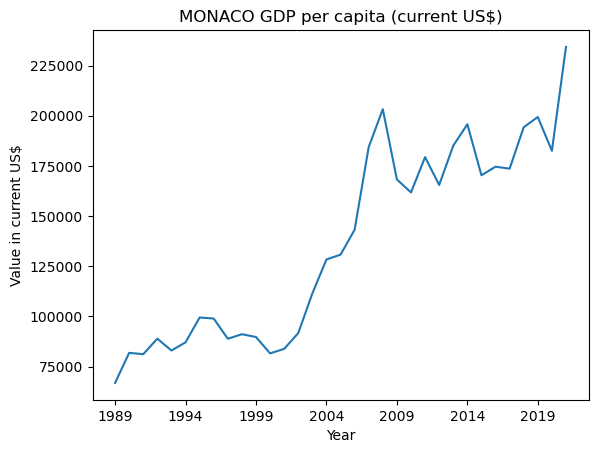

In [7]:
monaco.plot()

plt.title('MONACO GDP per capita (current US$)')
plt.xlabel('Year')
plt.ylabel('Value in current US$')
plt.show()

In [8]:
#SOMALIA 
somalia_Switz = gdp_country_data.iloc[[37,60], 30:]

#data=[213,37]
#x=gdp_country_data.iloc[:,data]

#somalia_Switz=gdp_country_data["1988", "1989"]

#plt.title('MONACO GDP per capita (current US$)')
#plt.xlabel('Year')
#plt.ylabel('Value in current US$')
#plt.show()

In [9]:
somalia_Switz=somalia_Switz.fillna("0")

soma=somalia_Switz.transpose()





In [44]:


soma=soma.rename(columns={37:"Algeria",60:"Switzerland" })

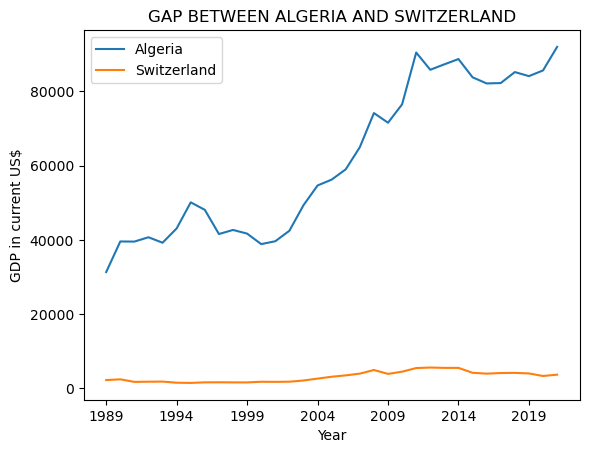

In [48]:
soma.plot(kind="line")
plt.title('GAP BETWEEN ALGERIA AND SWITZERLAND')
plt.xlabel('Year')
plt.ylabel('GDP in current US$')
plt.show()

In [12]:
#gdp_mona = gdp_country_data.loc[gdp_country_data.index, ['Country Name', year1, year2]].dropna()


#monaco.plot(kind="line")


#plt.title('CHINA GDP per capita (current US$)')
#plt.xlabel('Year')
#plt.ylabel('Value in current US$')
#plt.show()

In [13]:
#extract the required data for the clustering
gdp_data = gdp_country_data.loc[gdp_country_data.index, ['Country Name', year1, year2]].dropna()

gdp_data


,Country Name,1989,2021
0,Aruba,10767.396220,29342.100858
1,Africa Eastern and Southern,722.427496,1537.336021
3,Africa Western and Central,505.326339,1757.030626
4,Angola,891.743592,1953.533757
5,Albania,697.995597,6492.872012
...,...,...,...
259,World,3882.113626,12234.796802
260,Samoa,731.976518,3857.318464
263,South Africa,2794.395679,7055.044776
264,Zambia,533.772646,1137.343633


In [14]:
#convert the datafram to an array
x = gdp_data[[year1, year2]].dropna().values
x

array([[1.07673962e+04, 2.93421009e+04],
       [7.22427496e+02, 1.53733602e+03],
       [5.05326339e+02, 1.75703063e+03],
       [8.91743592e+02, 1.95353376e+03],
       [6.97995597e+02, 6.49287201e+03],
       [1.54040421e+04, 4.21373273e+04],
       [2.08118031e+03, 6.26635992e+03],
       [2.31410148e+04, 4.43155542e+04],
       [2.38256095e+03, 1.06361202e+04],
       [6.89538608e+03, 1.57813957e+04],
       [1.78345689e+04, 6.04431092e+04],
       [1.74689461e+04, 5.36377057e+04],
       [2.07291950e+02, 2.21477676e+02],
       [1.65250617e+04, 5.12470144e+04],
       [3.01684930e+02, 1.31915499e+03],
       [2.94043723e+02, 8.93077156e+02],
       [2.74389424e+02, 2.45792488e+03],
       [2.47702082e+03, 1.22214966e+04],
       [7.72173789e+03, 2.65629691e+04],
       [1.15332608e+04, 2.74783896e+04],
       [2.06572031e+03, 6.22826731e+03],
       [2.55179217e+04, 1.14090328e+05],
       [6.78642159e+02, 3.34519659e+03],
       [2.34473069e+03, 7.50716097e+03],
       [7.753025

In [15]:
"""
The  MinMaxScaler class below from the scikit-learn library's preprocessing module to scale , so that all the values 
are normalized and between 0 and 1. The fit_transform method is used to fit the scaler to the data and then transform it. 
The result of this operation is stored in the variable x_norm. 
This type of scaling is useful when the data has a large range and you want to bring it within a smaller range, like 0 to 1.
"""
scaler=preprocessing.MinMaxScaler()
x_norm=scaler.fit_transform(x)


In [16]:
x_norm

array([[1.60583166e-01, 1.24397145e-01],
       [1.01817444e-02, 5.62106864e-03],
       [6.93112978e-03, 6.55955754e-03],
       [1.27168824e-02, 7.39897737e-03],
       [9.81593022e-03, 2.67900706e-02],
       [2.30006790e-01, 1.79055647e-01],
       [3.05260939e-02, 2.58224589e-02],
       [3.45851022e-01, 1.88360572e-01],
       [3.50386094e-02, 4.44891509e-02],
       [1.02608288e-01, 6.64686800e-02],
       [2.66398608e-01, 2.57254077e-01],
       [2.60924208e-01, 2.28182832e-01],
       [2.46871711e-03, 0.00000000e+00],
       [2.46791605e-01, 2.17970304e-01],
       [3.88204539e-03, 4.68904542e-03],
       [3.76763504e-03, 2.86893098e-03],
       [3.47335492e-03, 9.55362960e-03],
       [3.64529392e-02, 5.12615437e-02],
       [1.14981098e-01, 1.12525282e-01],
       [1.72050311e-01, 1.16435765e-01],
       [3.02946143e-02, 2.56597353e-02],
       [3.81440001e-01, 4.86423655e-01],
       [9.52615485e-03, 1.33438667e-02],
       [3.44721840e-02, 3.11228986e-02],
       [1.154495

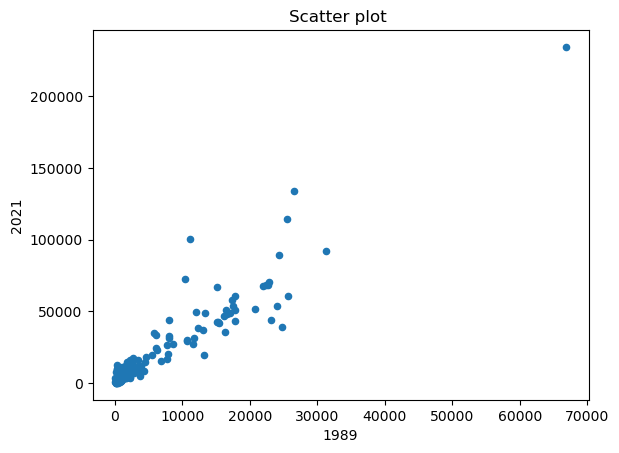

In [17]:
gdp_data.plot(year1, year2, kind='scatter')
plt.title('Scatter plot ')
plt.xlabel(year1)
plt.ylabel(year2)
plt.show() 

C:\Users\44776\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


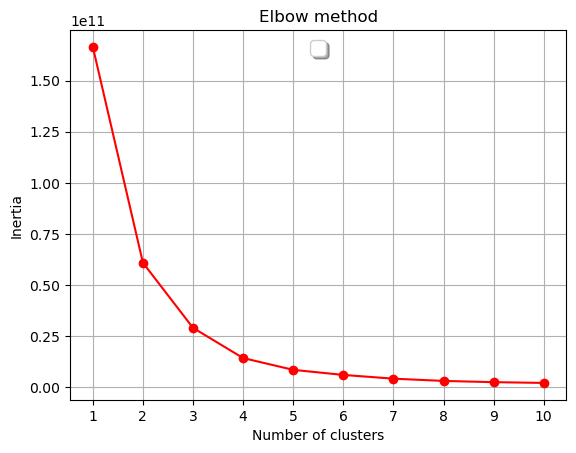

In [18]:
"""
This code is using the "elbow method" to find the optimal number of clusters 
for the K-means algorithm. The elbow method is a heuristic method to determine
 the number of clusters in a dataset.

First, an empty list sse is created. Then, a for loop iterates over the range
 from 1 to 11 (inclusive) and for each iteration, it creates a new KMeans
 object with the number of clusters set to the current iteration value. It 
 also sets some other parameters such as 'k-means++' as the initialization 
 method, max_iter as 300, n_init as 10, and random_state as 0.

It then fits the kmeans model to the data using the fit() method, and appends
 the value of the inertia_ attribute to the sse list. The inertia_ attribute
 returns the sum of squared distances of samples to their closest cluster
 center.

After the loop, it plots the range of number of clusters as x-axis and the 
sse as y-axis. It then sets the title as "Elbow method", x-label as "Number 
of clusters" and y-label as "Inertia" and finally shows the plot.

The idea behind the elbow method is that as the number of clusters increases,
 the SSE decreases. At some point, however, the decrease in SSE will not be 
 proportional to the number of clusters added. This point is the elbow of the
 plot and the number of clusters at this point is considered as the optimal
 number of clusters.

"""

RANGE = range(0, 11)

def plot_vals(vals, RANGE):
  plt.grid()
  plt.xticks(RANGE)
  
vals = [1,2,3,4,6,5,7,8,9,10]

plot_vals(vals, RANGE)


#for i in range(1, 11):
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
    
plt.plot(range(1,11), sse, marker="o", color="red")
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [20]:
y_kmeans

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0])

In [21]:
#this creates a new dataframe with the labels for each country
gdp_data['label'] = y_kmeans

gdp_data
df_label = gdp_data.loc[gdp_data['label'] == 0]
df_label.head(20)

,Country Name,1989,2021,label
0,Aruba,10767.396220,29342.100858,0
1,Africa Eastern and Southern,722.427496,1537.336021,0
3,Africa Western and Central,505.326339,1757.030626,0
4,Angola,891.743592,1953.533757,0
5,Albania,697.995597,6492.872012,0
7,Arab World,2081.180305,6266.359916,0
9,Argentina,2382.560951,10636.120196,0
12,Antigua and Barbuda,6895.386079,15781.395702,0
16,Burundi,207.291950,221.477676,0
18,Benin,301.684930,1319.154995,0


In [22]:
y = kmeans.cluster_centers_
y

array([[  1905.40043705,   7073.44586252],
       [ 18119.24238785,  59197.62481461],
       [ 66830.13668601, 234315.46050355]])

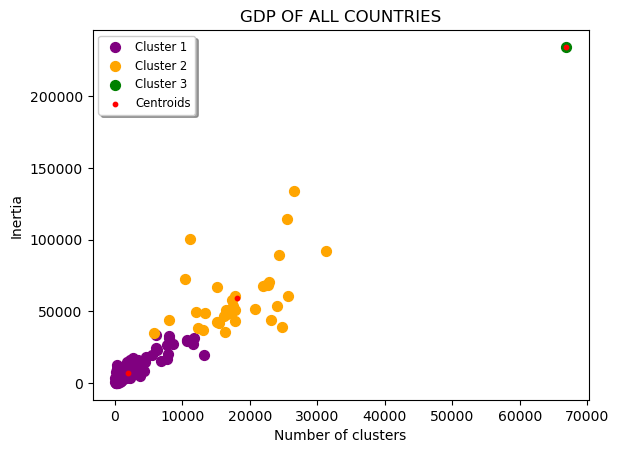

In [23]:
"""
This code is using matplotlib to visualize the results of the K-means 
clustering. It creates a scatter plot with each point representing a country 
and the color of the point representing the cluster to which the country
 belongs. The x-axis represents the GDP per capita of the country in 1989 
 and the y-axis represents the GDP per capita of the country in 2021.

It uses a loop to scatter the data points of each cluster in different colors:
    purple for cluster 1, orange for cluster 2, and green for cluster 3.
It also plots the centroids of each cluster in red.

The plt.legend() function is used to add a legend to the plot to indicate 
which color represents which cluster. Finally, it uses the plt.show() function
 to display the plot.
"""


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple',label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green',label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centroids')
plt.legend(loc='upper left', shadow=True, fontsize='small')

plt.title('GDP OF ALL COUNTRIES')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
def model(x, a, b, c, d):
    '''
    docstring
    
    '''
    return a*x**3 + b*x**2 + c*x + d

In [25]:
fitting = gdp_year_data[['Year', 'China']].apply(pd.to_numeric, errors='coerce')

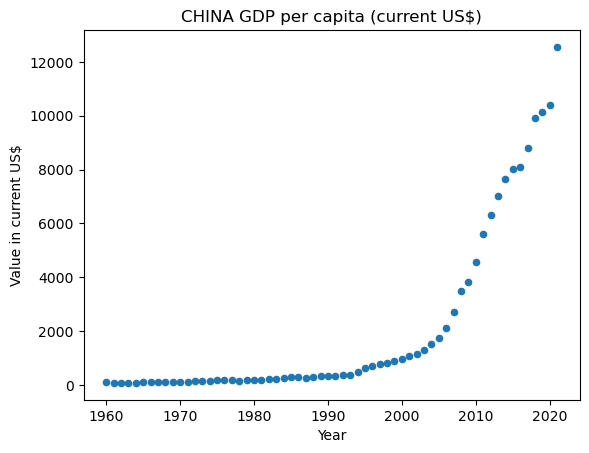

In [26]:
"""
This code is using the scipy.optimize module to fit a curve to a set of data.
 The curve_fit() function is being used to fit the model function to the data 
 in x_axis and y_axis. The function returns two variables: popt contains the 
 optimal values for the parameters of the model function, and covar contains
 the covariance of the parameters.


"""

fitting.plot("Year", "China", kind="scatter")
plt.title('CHINA GDP per capita (current US$)')
plt.xlabel('Year')
plt.ylabel('Value in current US$')
plt.show()

In [27]:
#for j in gdp_data:
 #    if j <= 1989:
 #         print (j)


#year_1989=gdp_year_data[gdp_year_data['Year'] >=1989].apply(pd.to_numeric, errors='coerce')

#monaco = gdp_year_data[gdp_year_data['Year']>=1989, 'Monaco']]

In [28]:
#year_1989=gdp_year_data[gdp_year_data['Year'] >=1989

#a=( gdp_year_data['Year'] > 1989) & (gdp_year_data['Year']  <= 2021)

 #

#year_gdp=gdp_year_data['Year'].values                      
#try:
#  i = int(gdp_year_data['Year'].values)

#except ValueError as err:
#  pass 
                        
                        

#fitting = gdp_year_data[gdp_year_data['Year']>=1989, 'Monaco'].apply(pd.to_numeric, errors='coerce')

#fitting.plot("Year", "Monaco", kind="scatter")
#plt.title('CHINA GDP per capita (current US$)')
#plt.xlabel('Year')
#plt.ylabel('Value in current US$')
#plt.show()

In [29]:
data_fitting = fitting.dropna().values

In [30]:
x_axis = data_fitting[:,0]
y_axis = data_fitting[:,1]

In [31]:
y_axis

array([   89.52054151,    75.80583793,    70.90941167,    74.31364345,
          85.49855516,    98.48677775,   104.32456618,    96.58953194,
          91.47271831,   100.12990327,   113.16299155,   118.65457779,
         131.88356124,   157.0903743 ,   160.14009373,   178.34181961,
         165.40554037,   185.42283291,   156.39638852,   183.98315222,
         194.80472219,   197.0714745 ,   203.3349195 ,   225.43192889,
         250.71396905,   294.4588485 ,   281.92812091,   251.81195696,
         283.53769524,   310.8819124 ,   317.88467304,   333.1421454 ,
         366.4606923 ,   377.38983948,   473.49227872,   609.6566792 ,
         709.41375509,   781.74416434,   828.5804793 ,   873.28706173,
         959.37248364,  1053.108243  ,  1148.50829044,  1288.64325183,
        1508.66809788,  1753.41782926,  2099.2294346 ,  2693.97006341,
        3468.30460207,  3832.23643247,  4550.45310776,  5614.35213523,
        6300.61511826,  7020.33848454,  7636.11660125,  8016.43143498,
      

In [32]:
"""
It then uses tuple unpacking to assign the optimal values of the parameters
 of the model function (a, b, c, d) to the variables a, b, c and d 
 respectively. It is important to note that the number of variables 
 should match the number of parameters in the model function.
"""

popt, _ = opt.curve_fit(model, x_axis, y_axis)
param, covar = opt.curve_fit(model, x_axis, y_axis)
a, b, c, d = popt

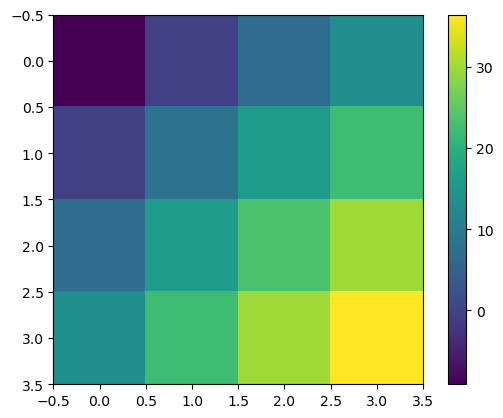

In [33]:
plt.imshow(np.log(np.abs(covar)))
plt.colorbar()
plt.show()

In [34]:
import numpy as np
sigma = np.sqrt(np.diag(covar))
low, up = err.err_ranges(data_fitting, model, popt, sigma)

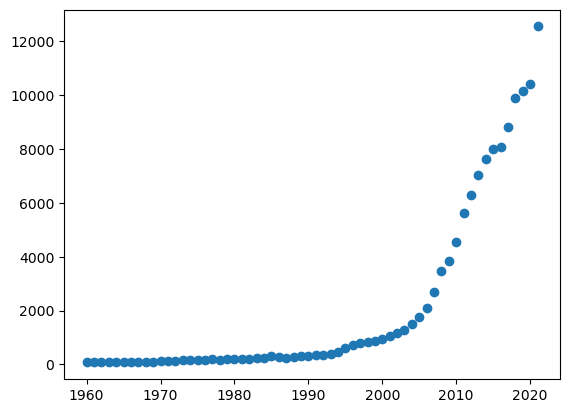

In [35]:
plt.scatter(x_axis, y_axis)

In [36]:
x_line = np.arange(min(x_axis), max(y_axis)+1, 1)
y_line = model(x_line, a, b, c, d)

In [37]:
print('low',low, 'up',up)
print(up.shape)

low [[-6.44453101e+08 -1.31280587e+09]
 [-6.44942475e+08 -1.33769225e+09]
 [-6.45432116e+08 -1.34667698e+09]
 [-6.45922023e+08 -1.34042479e+09]
 [-6.46412195e+08 -1.32006148e+09]
 [-6.46902631e+08 -1.29675768e+09]
 [-6.47393331e+08 -1.28640275e+09]
 [-6.47884292e+08 -1.30013888e+09]
 [-6.48375515e+08 -1.30929688e+09]
 [-6.48866998e+08 -1.29383568e+09]
 [-6.49358739e+08 -1.27086565e+09]
 [-6.49850739e+08 -1.26129681e+09]
 [-6.50342995e+08 -1.23851172e+09]
 [-6.50835508e+08 -1.19612917e+09]
 [-6.51328275e+08 -1.19109264e+09]
 [-6.51821297e+08 -1.16143947e+09]
 [-6.52314571e+08 -1.18244300e+09]
 [-6.52808097e+08 -1.15009078e+09]
 [-6.53301874e+08 -1.19727801e+09]
 [-6.53795900e+08 -1.15238968e+09]
 [-6.54290176e+08 -1.13521515e+09]
 [-6.54784699e+08 -1.13164845e+09]
 [-6.55279469e+08 -1.12184823e+09]
 [-6.55774485e+08 -1.08791842e+09]
 [-6.56269745e+08 -1.05031933e+09]
 [-6.56765249e+08 -9.88294485e+08]
 [-6.57260996e+08 -1.00567254e+09]
 [-6.57756984e+08 -1.04871572e+09]
 [-6.58253213e+0

In [38]:
x_axis

array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.])

In [39]:
y_axis

array([   89.52054151,    75.80583793,    70.90941167,    74.31364345,
          85.49855516,    98.48677775,   104.32456618,    96.58953194,
          91.47271831,   100.12990327,   113.16299155,   118.65457779,
         131.88356124,   157.0903743 ,   160.14009373,   178.34181961,
         165.40554037,   185.42283291,   156.39638852,   183.98315222,
         194.80472219,   197.0714745 ,   203.3349195 ,   225.43192889,
         250.71396905,   294.4588485 ,   281.92812091,   251.81195696,
         283.53769524,   310.8819124 ,   317.88467304,   333.1421454 ,
         366.4606923 ,   377.38983948,   473.49227872,   609.6566792 ,
         709.41375509,   781.74416434,   828.5804793 ,   873.28706173,
         959.37248364,  1053.108243  ,  1148.50829044,  1288.64325183,
        1508.66809788,  1753.41782926,  2099.2294346 ,  2693.97006341,
        3468.30460207,  3832.23643247,  4550.45310776,  5614.35213523,
        6300.61511826,  7020.33848454,  7636.11660125,  8016.43143498,
      

In [40]:


#aa=pd.DataFrame(data_fitting, columns=["new year", "con_China"])

#aa

#a1=aa["new year"]

#a2=aa["con_China"]
#a2

ValueError: 'x' is not 1-dimensional

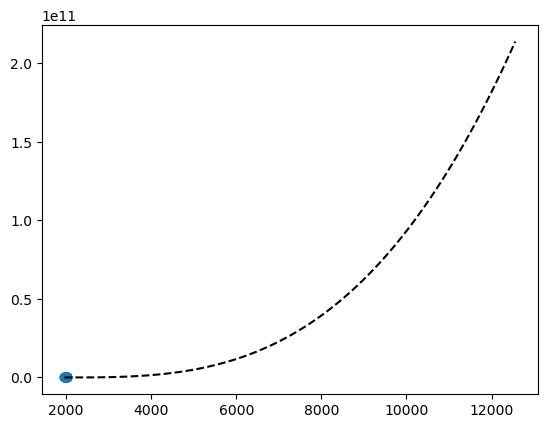

In [41]:
"""
his code is plotting the data in x_axis and y_axis as a scatter plot using 
matplotlib. It then calculates the standard deviation of the parameters 
obtained from the curve_fit() function, which is stored in sigma.

It then uses the err_ranges() function from the err_ranges module, 
which is using the data_fitting, the model, the optimal parameters 
and the standard deviation to calculate the low and upper error range, 
and assigns it to the variables low and up.

It then creates a new variable x_line which is an array of values 
ranging from the minimum value of the first column of the data_fitting 
to the maximum value of the first column of the data_fitting plus 1.

And creates a new variable y_line which is the result of applying the 
model function to the values of the x_line with the optimal parameters 
obtained from the curve_fit() function. It is important to note that this
 is just creating the values for the line, but it is not plotting it yet.


"""

plt.scatter(x_axis, y_axis)
plt.plot(x_line, y_line, '--', color='black')
plt.fill_between(data_fitting, low, up, alpha=0.7, color='green')
plt.title('Data Fitting')
plt.xlabel('Year')
plt.ylabel('')
plt.show()


#(x_axis, y_axis)
plt.scatter(x_axis, y_axis)
plt.plot(x_line, y_line, '--', color='black')
plt.fill_between(x_axis, low, up, alpha=0.7, color='green')
plt.title('Data Fitting')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.show()



In [ ]:
country="Canada"

In [ ]:
aa

In [ ]:
country = ['Aruba',
'Afghanistan',
'Angola',
'Albania',
'Andorra',
'Arab World',
'United Arab Emirates',
'Argentina',
'Armenia',
'American Samoa',
'Antigua and Barbuda',
'Australia',
'Austria',
'Azerbaijan',
'Burundi',
'Belgium',
'Benin',
'Burkina Faso',
'Bangladesh',
'Bulgaria',
'Bahrain',
'Bahamas, The',
'Bosnia and Herzegovina',
'Belarus',
'Belize',
'Bermuda',
'Bolivia',
'Brazil',
'Barbados',
'Brunei Darussalam',
'Bhutan',
'Botswana',
'Canada',
'Switzerland',
'Channel Islands',
'Chile',
'China',
'Cameroon',
'Congo, Dem. Rep.',
'Congo, Rep.',
'Colombia',
'Comoros',
'Cabo Verde',
'Costa Rica',
'Cuba',
'Curacao',
'Cayman Islands',
'Cyprus',
'Czechia',
'Germany',
'Djibouti',
'Dominica',
'Denmark',
'Dominican Republic',
'Algeria',
'Ecuador',
'Egypt, Arab Rep.',
'Euro area',
'Eritrea',
'Spain',
'Estonia',
'Ethiopia',
'European Union',
'Finland',
'Fiji',
'France',
'Faroe Islands',
'Micronesia, Fed. Sts.',
'Gabon',
'United Kingdom',
'Georgia',
'Ghana',
'Gibraltar',
'Guinea',
'Gambia, The',
'Guinea-Bissau',
'Equatorial Guinea',
'Greece',
'Grenada',
'Greenland',
'Guatemala',
'Guam',
'Guyana',
'High income',
'Hong Kong SAR, China',
'Honduras',
'Croatia',
'Haiti',
'Hungary',
'IBRD only',
'IDA & IBRD total',
'IDA total',
'IDA blend',
'Indonesia',
'IDA only',
'Isle of Man',
'India',
'Not classified',
'Ireland',
'Iran, Islamic Rep.',
'Iraq',
'Iceland',
'Israel',
'Italy',
'Jamaica',
'Jordan',
'Japan',
'Kazakhstan',
'Kenya',
'Kyrgyz Republic',
'Cambodia',
'Kiribati',
'St. Kitts and Nevis',
'Korea, Rep.',
'Kuwait',
'Lao PDR',
'Lebanon',
'Liberia',
'Libya',
'St. Lucia',
'Low income',
'Liechtenstein',
'Sri Lanka',
'Lower middle income',
'Low & middle income',
'Lesotho',
'Lithuania',
'Luxembourg',
'Latvia',
'Macao SAR, China',
'Morocco',
'Monaco',
'Moldova',
'Madagascar',
'Maldives',
'Mexico',
'Marshall Islands',
'Middle income',
'North Macedonia',
'Mali',
'Malta',
'Myanmar',
'Montenegro',
'Mongolia',
'Northern Mariana Islands',
'Mozambique',
'Mauritania',
'Mauritius',
'Malawi',
'Malaysia',
'North America',
'Namibia',
'New Caledonia',
'Niger',
'Nigeria',
'Nicaragua',
'Netherlands',
'Norway',
'Nepal',
'Nauru',
'New Zealand',
'OECD members',
'Oman',
'Other small states',
'Pakistan',
'Panama',
'Peru',
'Philippines',
'Palau',
'Papua New Guinea',
'Poland',
'Pre-demographic dividend',
'Puerto Rico',
'Portugal',
'Paraguay',
'Qatar',
'Romania',
'Russian Federation',
'Rwanda',
'South Asia',
'Saudi Arabia',
'Sudan',
'Senegal',
'Singapore',
'Solomon Islands',
'Sierra Leone',
'El Salvador',
'San Marino',
'Somalia',
'Serbia',
'South Sudan',
'Sub-Saharan Africa',
'Small states',
'Sao Tome and Principe',
'Suriname',
'Slovak Republic',
'Slovenia',
'Sweden',
'Eswatini',
'Sint Maarten (Dutch part)',
'Seychelles',
'Syrian Arab Republic',
'Turks and Caicos Islands',
'Chad',
'Togo',
'Thailand',
'Tajikistan',
'Turkmenistan',
'Timor-Leste',
'Tonga',
'Trinidad and Tobago',
'Tunisia',
'Turkiye',
'Tuvalu',
'Tanzania',
'Uganda',
'Ukraine',
'Upper middle income',
'Uruguay',
'United States',
'Uzbekistan',
'St. Vincent and the Grenadines',
'Venezuela, RB',
'British Virgin Islands',
'Virgin Islands (U.S.)',
'Vietnam',
'Vanuatu',
'World',
'Samoa',
'Kosovo',
'Yemen, Rep.',
'South Africa',
'Zambia',
'Zimbabwe']

In [ ]:
for i in country:
    plt.figure()
    plt.plot(df_year['Year'], df_year[i], label=i)
    plt.xticks(rotation='vertical')
    plt.xlabel('Year')
    plt.ylabel('population_growth')
    plt.legend()
    plt.title('population growth of'+i)
    plt.show()